In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

In [2]:
df = pd.read_csv(r"D:\projects\minor Project cab112\Regensburg_peditrics_appendictics(Data set).csv")
df

Age    BMI     Sex  Height  Weight  Length_of_Stay  Alvarado_Score  \
0    12.68  16.90  female   148.0    37.0             3.0             4.0   
1    14.10  31.90    male   147.0    69.5             2.0             5.0   
2    14.14  23.30  female   163.0    62.0             4.0             5.0   
3    16.37  20.60  female   165.0    56.0             3.0             7.0   
4    11.08  16.90  female   163.0    45.0             3.0             5.0   
..     ...    ...     ...     ...     ...             ...             ...   
777  12.41  25.25  female   166.5    70.0             4.0             8.0   
778  17.09  20.43  female   158.0    51.0             6.0             5.0   
779  14.99  19.91  female   152.0    46.0             4.0             5.0   
780   7.20  14.30    male   129.3    23.9             5.0             9.0   
781  11.51  18.17    male   146.5    39.0             4.0             2.0   

     Paedriatic_Appendicitis_Score Appendix_on_US  Appendix_Diameter  ...  \
0                              3.0            yes                7.1  ...   
1                              4.0             no                NaN  ...   
2                              3.0             no                NaN  ...   
3                              6.0             no                NaN  ...   
4                              6.0            yes                7.0  ...   
..                             ...            ...                ...  ...   
777                            7.0            yes                7.5  ...   
778                            3.0             no                NaN  ...   
779                            3.0             no                NaN  ...   
780                            8.0            yes               14.0  ...   
781                            2.0            yes                8.0  ...   

    Bowel_Wall_Thickening Conglomerate_of_Bowel_Loops Ileus Coprostasis  \
0                     NaN                         NaN   NaN         NaN   
1                     NaN                         NaN   NaN         NaN   
2                     NaN                         NaN   NaN         NaN   
3                     NaN                         NaN   NaN         NaN   
4                     NaN                         NaN   NaN         NaN   
..                    ...                         ...   ...         ...   
777                   NaN                         NaN   NaN         NaN   
778                   yes                         yes   NaN         NaN   
779                   NaN                         NaN   NaN         NaN   
780                   yes                         NaN    no         NaN   
781                   NaN                         NaN   yes         NaN   

    Meteorism Enteritis  Gynecological_Findings          Management  \
0         NaN       NaN                     NaN        conservative   
1         yes       NaN                     NaN        conservative   
2         yes       yes                     NaN        conservative   
3         NaN       yes                     NaN        conservative   
4         NaN       yes                     NaN        conservative   
..        ...       ...                     ...                 ...   
777       NaN       NaN                     NaN    primary surgical   
778       NaN       NaN                     NaN  secondary surgical   
779       NaN       NaN             unauffällig    primary surgical   
780       NaN       NaN                     NaN    primary surgical   
781       NaN       NaN                     NaN    primary surgical   

          Severity        Diagnosis  
0    uncomplicated     appendicitis  
1    uncomplicated  no appendicitis  
2    uncomplicated  no appendicitis  
3    uncomplicated  no appendicitis  
4    uncomplicated     appendicitis  
..             ...              ...  
777  uncomplicated     appendicitis  
778    complicated     appendicitis  
779  uncomplicated     appendicitis  
780  uncomplicated     

In [3]:
# dropping unwanted columns
threshold = 0.8
data = df.loc[:, df.isnull().mean() < threshold]

In [4]:
# Filling continuous values with mean and categorical values with mode
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

In [5]:
data.isnull().all()

Age                                 False
BMI                                 False
Sex                                 False
Height                              False
Weight                              False
Length_of_Stay                      False
Alvarado_Score                      False
Paedriatic_Appendicitis_Score       False
Appendix_on_US                      False
Appendix_Diameter                   False
Migratory_Pain                      False
Lower_Right_Abd_Pain                False
Contralateral_Rebound_Tenderness    False
Coughing_Pain                       False
Nausea                              False
Loss_of_Appetite                    False
Body_Temperature                    False
WBC_Count                           False
Neutrophil_Percentage               False
Neutrophilia                        False
RBC_Count                           False
Hemoglobin                          False
RDW                                 False
Thrombocyte_Count                 

In [6]:
data.duplicated().sum()

0

In [7]:
print("Shape of DataSet : ",df.shape)
df

Shape of DataSet :  (782, 56)


Age    BMI     Sex  Height  Weight  Length_of_Stay  Alvarado_Score  \
0    12.68  16.90  female   148.0    37.0             3.0             4.0   
1    14.10  31.90    male   147.0    69.5             2.0             5.0   
2    14.14  23.30  female   163.0    62.0             4.0             5.0   
3    16.37  20.60  female   165.0    56.0             3.0             7.0   
4    11.08  16.90  female   163.0    45.0             3.0             5.0   
..     ...    ...     ...     ...     ...             ...             ...   
777  12.41  25.25  female   166.5    70.0             4.0             8.0   
778  17.09  20.43  female   158.0    51.0             6.0             5.0   
779  14.99  19.91  female   152.0    46.0             4.0             5.0   
780   7.20  14.30    male   129.3    23.9             5.0             9.0   
781  11.51  18.17    male   146.5    39.0             4.0             2.0   

     Paedriatic_Appendicitis_Score Appendix_on_US  Appendix_Diameter  ...  \
0                              3.0            yes                7.1  ...   
1                              4.0             no                NaN  ...   
2                              3.0             no                NaN  ...   
3                              6.0             no                NaN  ...   
4                              6.0            yes                7.0  ...   
..                             ...            ...                ...  ...   
777                            7.0            yes                7.5  ...   
778                            3.0             no                NaN  ...   
779                            3.0             no                NaN  ...   
780                            8.0            yes               14.0  ...   
781                            2.0            yes                8.0  ...   

    Bowel_Wall_Thickening Conglomerate_of_Bowel_Loops Ileus Coprostasis  \
0                     NaN                         NaN   NaN         NaN   
1                     NaN                         NaN   NaN         NaN   
2                     NaN                         NaN   NaN         NaN   
3                     NaN                         NaN   NaN         NaN   
4                     NaN                         NaN   NaN         NaN   
..                    ...                         ...   ...         ...   
777                   NaN                         NaN   NaN         NaN   
778                   yes                         yes   NaN         NaN   
779                   NaN                         NaN   NaN         NaN   
780                   yes                         NaN    no         NaN   
781                   NaN                         NaN   yes         NaN   

    Meteorism Enteritis  Gynecological_Findings          Management  \
0         NaN       NaN                     NaN        conservative   
1         yes       NaN                     NaN        conservative   
2         yes       yes                     NaN        conservative   
3         NaN       yes                     NaN        conservative   
4         NaN       yes                     NaN        conservative   
..        ...       ...                     ...                 ...   
777       NaN       NaN                     NaN    primary surgical   
778       NaN       NaN                     NaN  secondary surgical   
779       NaN       NaN             unauffällig    primary surgical   
780       NaN       NaN                     NaN    primary surgical   
781       NaN       NaN                     NaN    primary surgical   

          Severity        Diagnosis  
0    uncomplicated     appendicitis  
1    uncomplicated  no appendicitis  
2    uncomplicated  no appendicitis  
3    uncomplicated  no appendicitis  
4    uncomplicated     appendicitis  
..             ...              ...  
777  uncomplicated     appendicitis  
778    complicated     appendicitis  
779  uncomplicated     appendicitis  
780  uncomplicated     

In [8]:
for i in data.select_dtypes(include=['object']).columns:
    print(i, "======", data[i].unique())

Sex ====== ['female' 'male']
Appendix_on_US ====== ['yes' 'no']
Migratory_Pain ====== ['no' 'yes']
Lower_Right_Abd_Pain ====== ['yes' 'no']
Contralateral_Rebound_Tenderness ====== ['yes' 'no']
Coughing_Pain ====== ['no' 'yes']
Nausea ====== ['no' 'yes']
Loss_of_Appetite ====== ['yes' 'no']
Neutrophilia ====== ['no' 'yes']
Ketones_in_Urine ====== ['++' 'no' '+++' '+']
RBC_in_Urine ====== ['+' 'no' '++' '+++']
WBC_in_Urine ====== ['no' '+' '+++' '++']
Dysuria ====== ['no' 'yes']
Stool ====== ['normal' 'constipation' 'diarrhea' 'constipation, diarrhea']
Peritonitis ====== ['no' 'local' 'generalized']
Psoas_Sign ====== ['yes' 'no']
Ipsilateral_Rebound_Tenderness ====== ['no' 'yes']
US_Performed ====== ['yes' 'no']
Free_Fluids ====== ['no' 'yes']
Appendix_Wall_Layers ====== ['intact' 'raised' 'upset' 'partially raised']
Surrounding_Tissue_Reaction ====== ['yes' 'no']
Pathological_Lymph_Nodes ====== ['yes' 'no']
Management ====== ['conservative' 'primary surgical' 'secondary surgical'
 'simu

In [9]:
values_to_replace = ['++', '+++', '+']

# Replace multiple values with NaN accros the entire dataset
data.replace(values_to_replace, np.nan, inplace=True)

In [10]:
# Filling continuous values with mean and categorical values with mode
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:
        data[column].fillna(data[column].median(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

In [11]:
for i in df.select_dtypes(include='object').columns:
    print(i,"========",df[i].unique())

Sex ======== ['female' 'male' nan]
Appendix_on_US ======== ['yes' 'no' nan]
Migratory_Pain ======== ['no' 'yes' nan]
Lower_Right_Abd_Pain ======== ['yes' 'no' nan]
Contralateral_Rebound_Tenderness ======== ['yes' 'no' nan]
Coughing_Pain ======== ['no' 'yes' nan]
Nausea ======== ['no' 'yes' nan]
Loss_of_Appetite ======== ['yes' 'no' nan]
Neutrophilia ======== ['no' 'yes' nan]
Ketones_in_Urine ======== ['++' 'no' nan '+++' '+']
RBC_in_Urine ======== ['+' 'no' nan '++' '+++']
WBC_in_Urine ======== ['no' '+' nan '+++' '++']
Dysuria ======== ['no' 'yes' nan]
Stool ======== ['normal' 'constipation' 'diarrhea' nan 'constipation, diarrhea']
Peritonitis ======== ['no' 'local' 'generalized' nan]
Psoas_Sign ======== ['yes' 'no' nan]
Ipsilateral_Rebound_Tenderness ======== ['no' 'yes' nan]
US_Performed ======== ['yes' 'no' nan]
Free_Fluids ======== ['no' 'yes' nan]
Appendix_Wall_Layers ======== ['intact' nan 'raised' 'upset' 'partially raised']
Target_Sign ======== [nan 'yes' 'no']
Appendicolith =

In [12]:
data.select_dtypes(include=['number','float64']).columns

Index(['Age', 'BMI', 'Height', 'Weight', 'Length_of_Stay', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Appendix_Diameter',
       'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'RBC_Count',
       'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'CRP'],
      dtype='object')

#### Describing 

In [13]:
numerical_columns = data[['Age', 'BMI', 'Height', 'Weight', 'Length_of_Stay', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Appendix_Diameter',
       'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'RBC_Count',
       'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'CRP']].corr()
numerical_columns

Age       BMI    Height    Weight  \
Age                            1.000000  0.470380  0.848794  0.764387   
BMI                            0.470380  1.000000  0.462533  0.848532   
Height                         0.848794  0.462533  1.000000  0.819685   
Weight                         0.764387  0.848532  0.819685  1.000000   
Length_of_Stay                -0.104131 -0.045387 -0.107892 -0.067139   
Alvarado_Score                -0.174855 -0.115331 -0.127773 -0.141289   
Paedriatic_Appendicitis_Score -0.123297 -0.095240 -0.103108 -0.117242   
Appendix_Diameter             -0.023053  0.028913 -0.004866  0.028137   
Body_Temperature              -0.290179 -0.149009 -0.228931 -0.209730   
WBC_Count                     -0.247443 -0.120854 -0.198448 -0.178279   
Neutrophil_Percentage         -0.165268 -0.167653 -0.118367 -0.169631   
RBC_Count                      0.042786  0.072380  0.077073  0.089066   
Hemoglobin                     0.255491  0.138946  0.297121  0.237960   
RDW                           -0.011621  0.024250 -0.020611  0.003061   
Thrombocyte_Count             -0.260489 -0.033987 -0.265712 -0.171665   
CRP                           -0.129285 -0.067366 -0.125405 -0.091696   

                               Length_of_Stay  Alvarado_Score  \
Age                                 -0.104131       -0.174855   
BMI                                 -0.045387       -0.115331   
Height                              -0.107892       -0.127773   
Weight                              -0.067139       -0.141289   
Length_of_Stay                       1.000000        0.292900   
Alvarado_Score                       0.292900        1.000000   
Paedriatic_Appendicitis_Score        0.214858        0.832473   
Appendix_Diameter                    0.233811        0.266102   
Body_Temperature                     0.226016        0.367968   
WBC_Count                            0.290889        0.621369   
Neutrophil_Percentage                0.213455        0.669954   
RBC_Count                           -0.079985       -0.006123   
Hemoglobin                          -0.070621       -0.051432   
RDW                                  0.080242        0.059579   
Thrombocyte_Count                    0.094046        0.066810   
CRP                                  0.506248        0.316117   

                               Paedriatic_Appendicitis_Score  \
Age                                                -0.123297   
BMI                                                -0.095240   
Height                                             -0.103108   
Weight                                             -0.117242   
Length_of_Stay                                      0.214858   
Alvarado_Score                                      0.832473   
Paedriatic_Appendicitis_Score                       1.000000   
Appendix_Diameter                                   0.209045   
Body_Temperature                                    0.293225   
WBC_Count                                           0.472854   
Neutrophil_Percentage                               0.533783   
RBC_Count                                          -0.005805   
Hemoglobin                                         -0.055491   
RDW                                                 0.020746   
Thrombocyte_Count                                   0.032745   
CRP                                                 0.253467   

                               Appendix_Diameter  Body_Temperature  WBC_Count  \
Age                                    -0.023053         -0.290179  -0.247443   
BMI                                     0.028913         -0.149009  -0.120854   
Height                                 -0.004866         -0.228931  -0.198448   
Weight                                  0.028137         -0.209730  -0.178279   
Length_of_Stay                          0.233811          0.226016   0.290889   
Alvarado_Score                          0.266102          0.367968   0.621369   
Paedriatic_Appendicitis_Score   

##### Correlation

<Axes: >

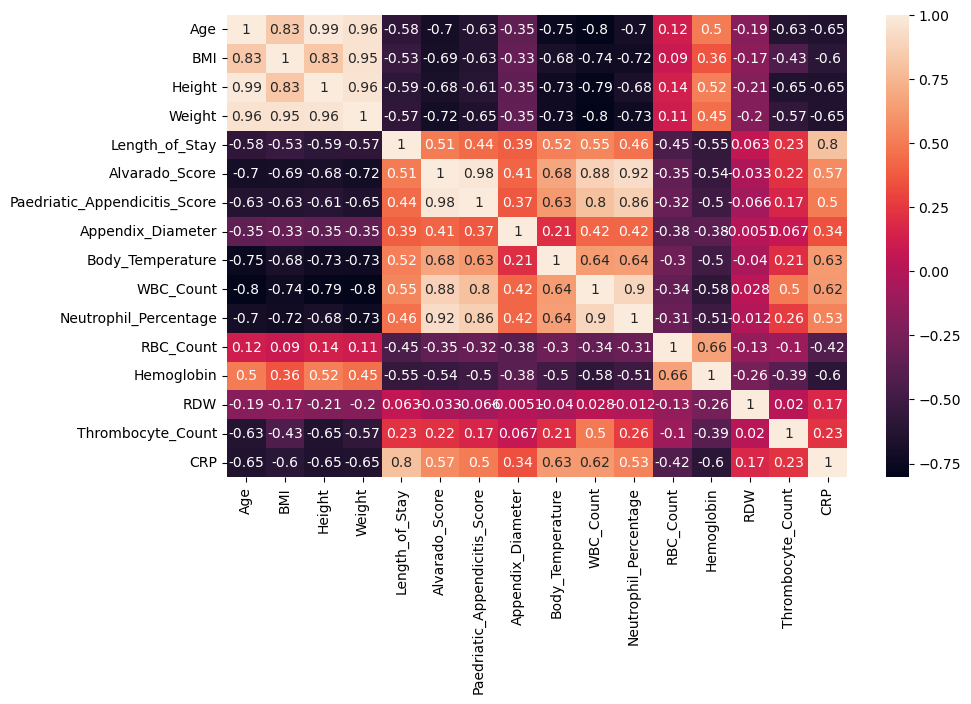

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_columns.corr(), annot=True)

In [15]:
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

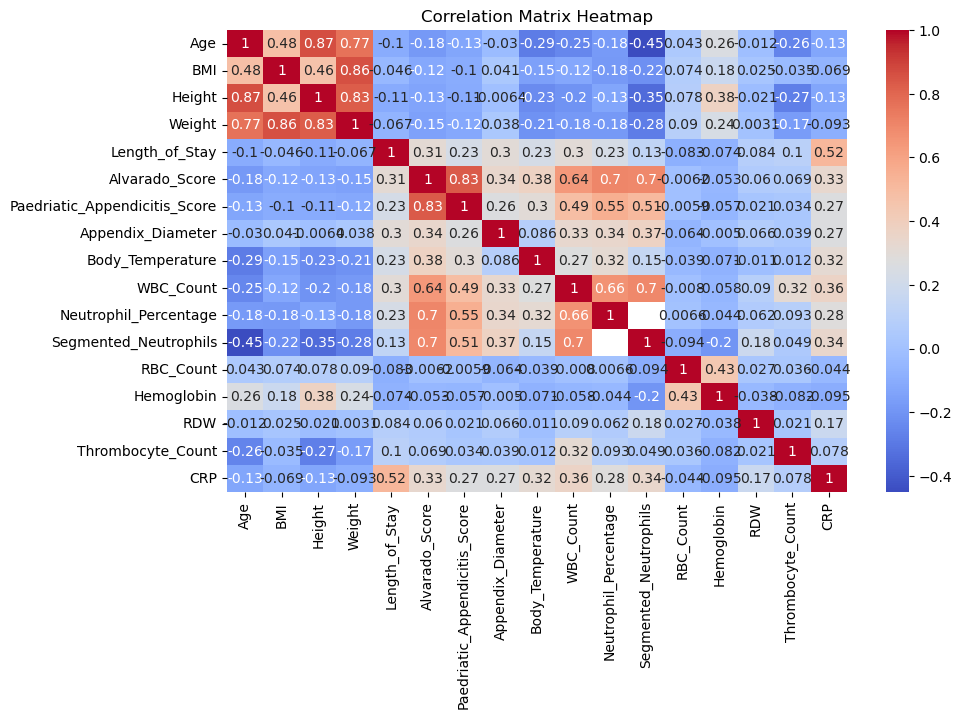

In [16]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[continuous_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

##### Outliers

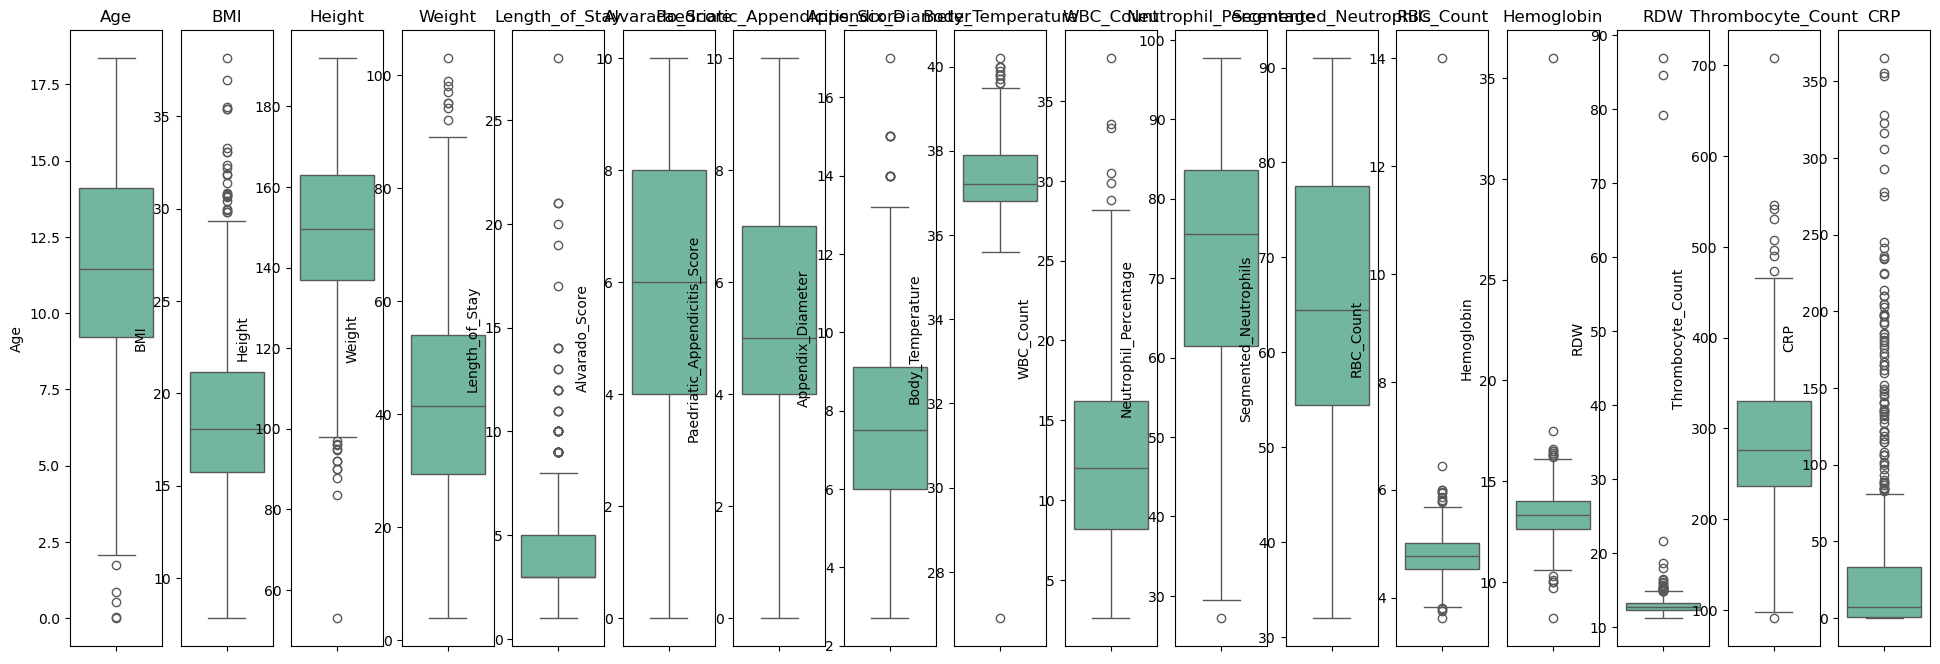

In [17]:
fig, axes = plt.subplots(1, len(continuous_columns), figsize=(24, 8),squeeze=False)
for i, col in enumerate(continuous_columns):
    sns.boxplot(data=df, y=col, palette='Set2', ax=axes[0,i])
    axes[0, i].set_title(f'{col}')

In [18]:
column=['Age', 'BMI', 'Height', 'Weight', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Body_Temperature', 'WBC_Count',
       'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'CRP']
def remove_outliers(df, columns):
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Remove outliers from columns 'A' and 'B'
data_cleaned = remove_outliers(df, ['Age', 'BMI', 'Height', 'Weight', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Body_Temperature', 'WBC_Count',
       'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'CRP'])

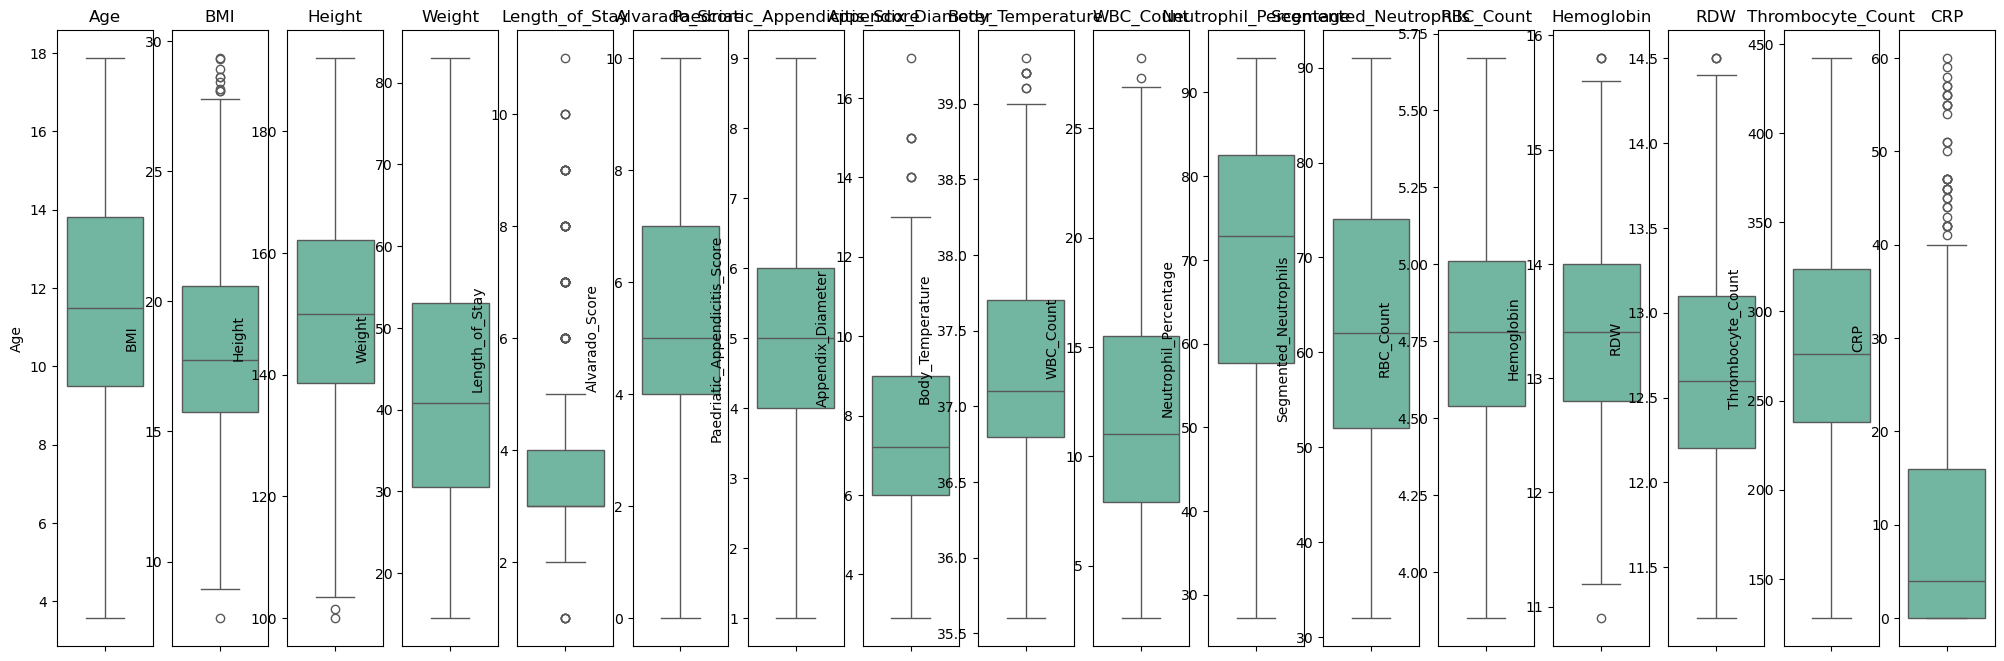

In [19]:
fig, axes = plt.subplots(1, len(continuous_columns), figsize=(25, 8),squeeze=False)
for i, col in enumerate(continuous_columns):
    sns.boxplot(data=data_cleaned, y=col, palette='Set2', ax=axes[0,i])
    axes[0, i].set_title(f'{col}')

#### Pairplot about Diagnosis

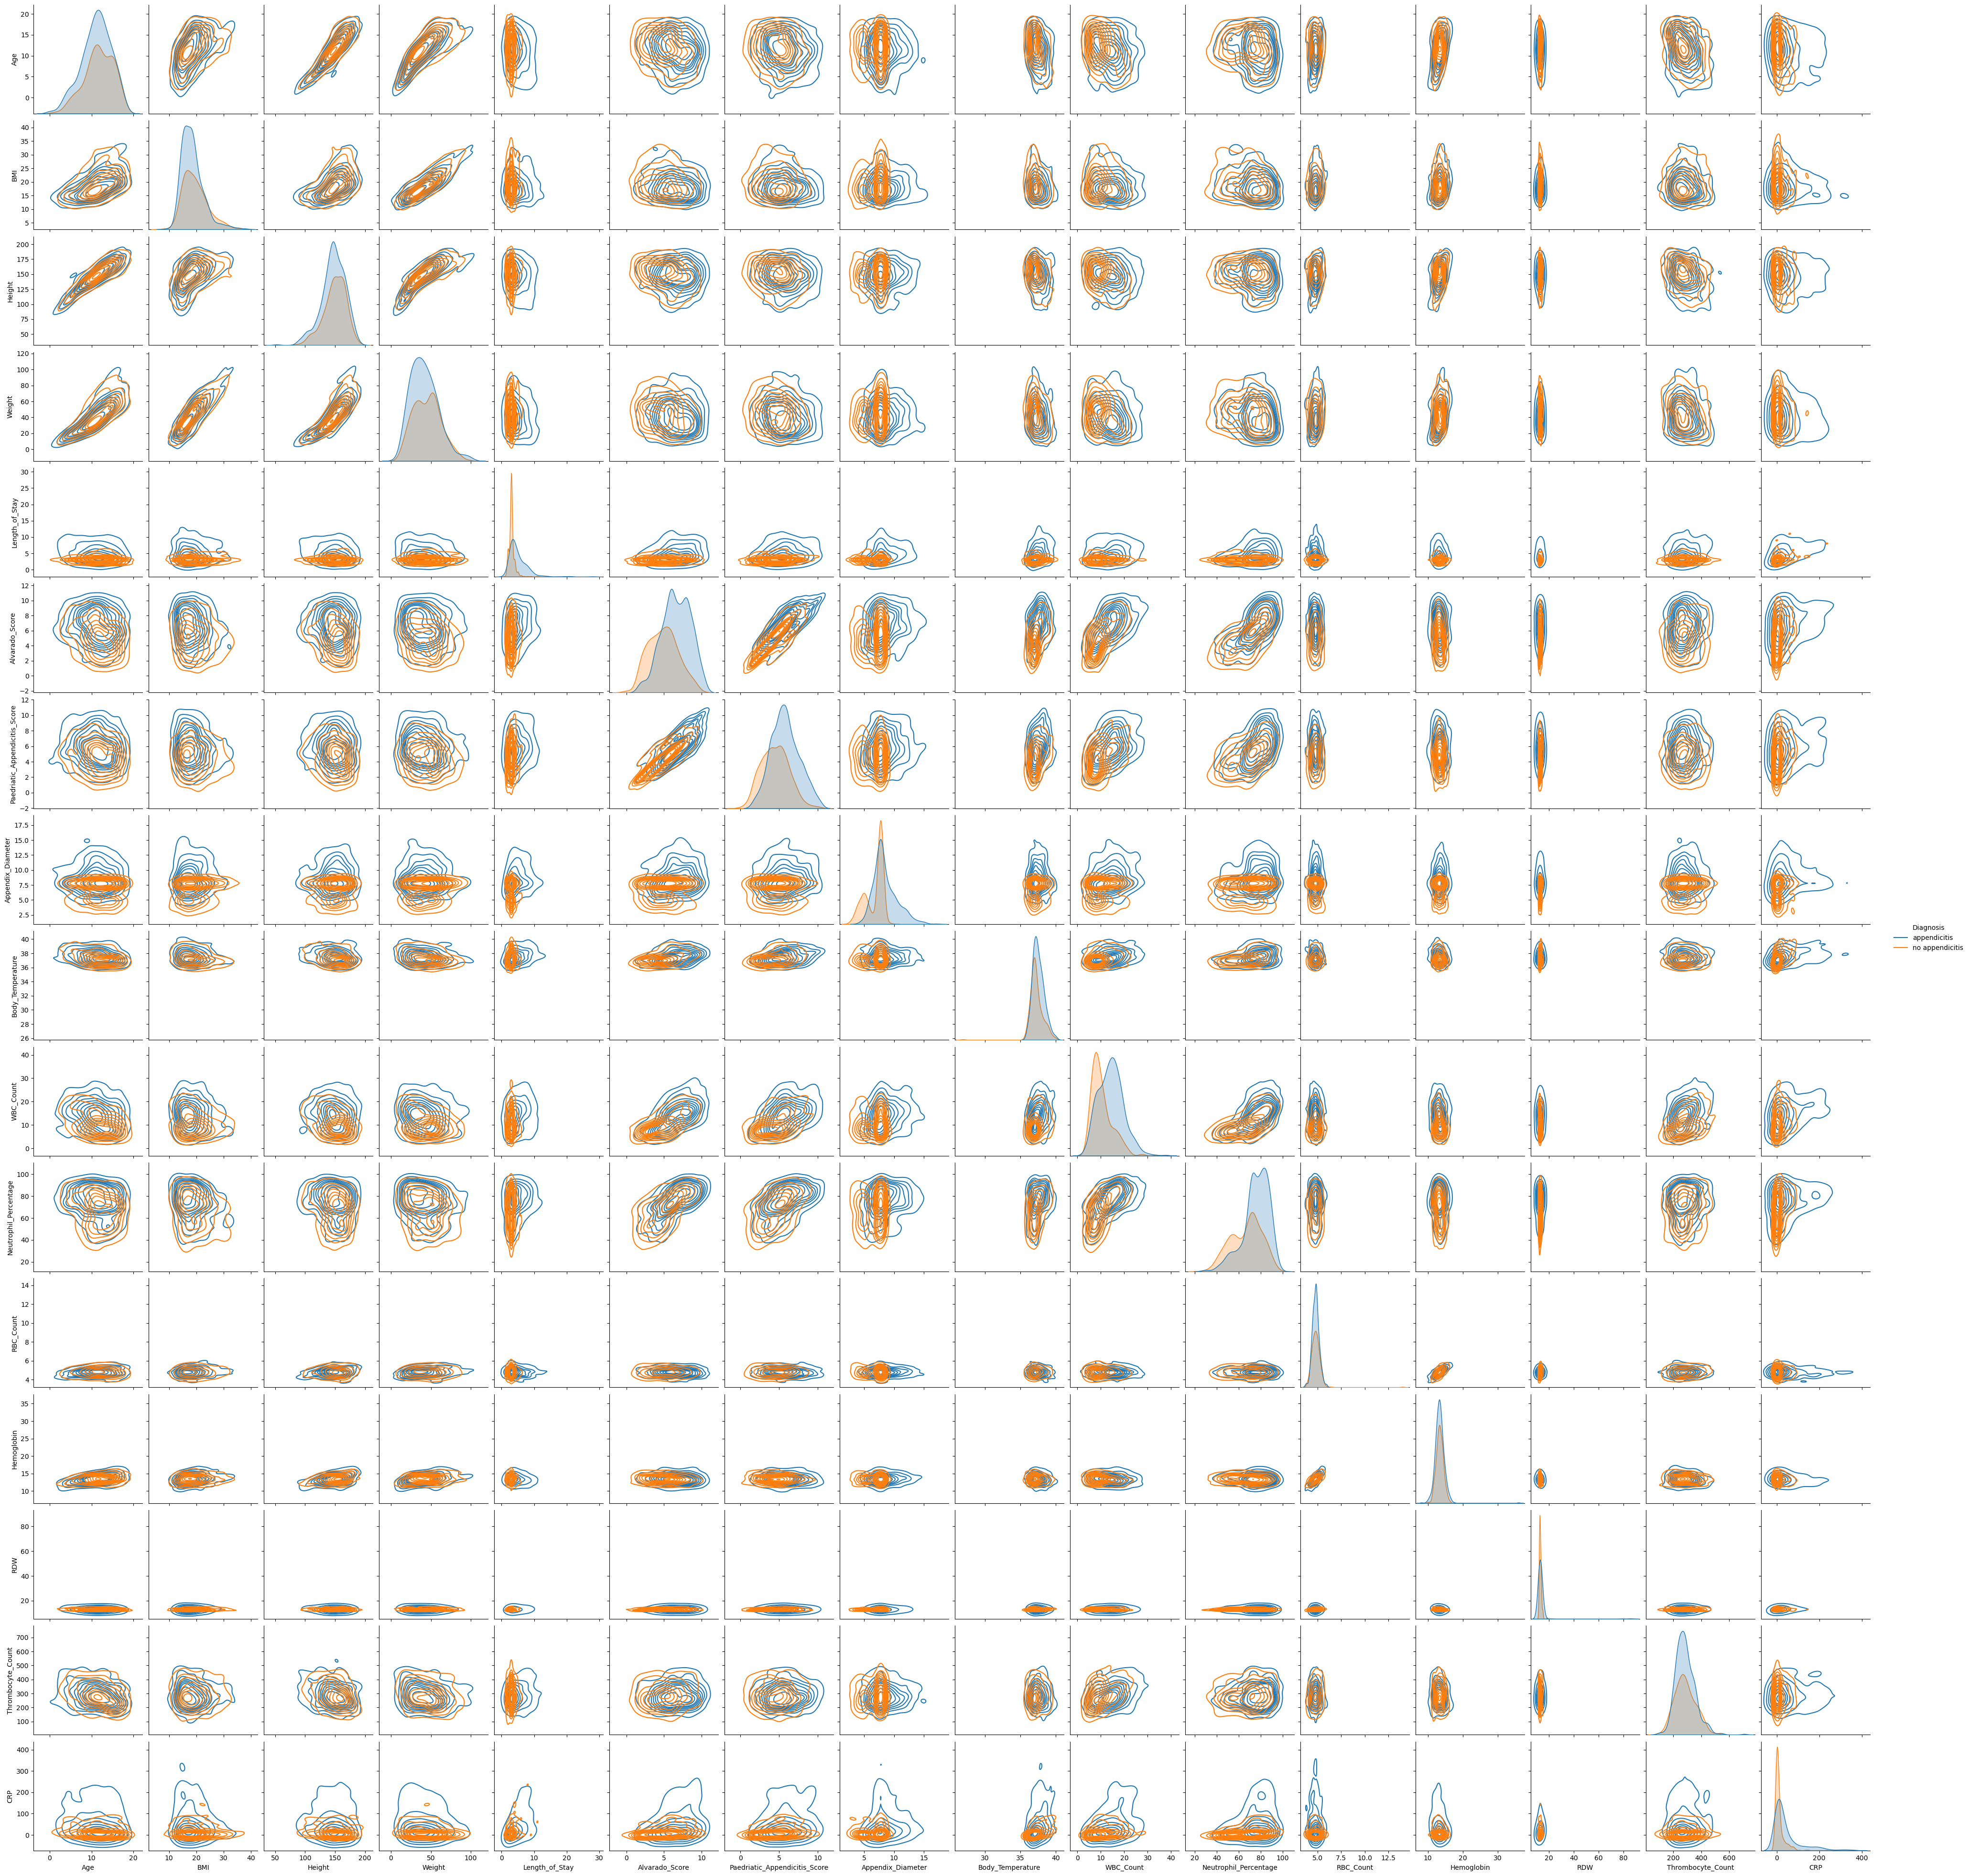

In [20]:
sns.pairplot(data, hue='Diagnosis', kind='kde')
plt.show()

In [21]:
data_cleaned=data
data_cleaned.shape

(782, 41)

In [22]:
dummy = data_cleaned.copy()

#### Label Encoding

In [23]:
le = LabelEncoder()
for i in dummy.select_dtypes(include='object').columns:
    dummy[i]=dummy[i].astype(str)
    dummy[i]=le.fit_transform(dummy[i])
dummy

Age    BMI  Sex  Height  Weight  Length_of_Stay  Alvarado_Score  \
0    12.68  16.90    0   148.0    37.0             3.0             4.0   
1    14.10  31.90    1   147.0    69.5             2.0             5.0   
2    14.14  23.30    0   163.0    62.0             4.0             5.0   
3    16.37  20.60    0   165.0    56.0             3.0             7.0   
4    11.08  16.90    0   163.0    45.0             3.0             5.0   
..     ...    ...  ...     ...     ...             ...             ...   
777  12.41  25.25    0   166.5    70.0             4.0             8.0   
778  17.09  20.43    0   158.0    51.0             6.0             5.0   
779  14.99  19.91    0   152.0    46.0             4.0             5.0   
780   7.20  14.30    1   129.3    23.9             5.0             9.0   
781  11.51  18.17    1   146.5    39.0             4.0             2.0   

     Paedriatic_Appendicitis_Score  Appendix_on_US  Appendix_Diameter  ...  \
0                              3.0               1           7.100000  ...   
1                              4.0               0           7.762651  ...   
2                              3.0               0           7.762651  ...   
3                              6.0               0           7.762651  ...   
4                              6.0               1           7.000000  ...   
..                             ...             ...                ...  ...   
777                            7.0               1           7.500000  ...   
778                            3.0               0           7.762651  ...   
779                            3.0               0           7.762651  ...   
780                            8.0               1          14.000000  ...   
781                            2.0               1           8.000000  ...   

     Psoas_Sign  Ipsilateral_Rebound_Tenderness  US_Performed  Free_Fluids  \
0             1                               0             1            0   
1             1                               0             1            0   
2             1                               0             1            0   
3             1                               0             1            0   
4             1                               0             1            0   
..          ...                             ...           ...          ...   
777           1                               0             1            0   
778           0                               0             1            0   
779           0                               0             1            1   
780           0                               0             1            1   
781           0                               0             1            0   

     Appendix_Wall_Layers  Surrounding_Tissue_Reaction  \
0                       0                            1   
1                       0                            1   
2                       0                            1   
3                       0                            1   
4                       0                            1   
..                    ...                          ...   
777                     2                            1   
778                     0                            1   
779                     0                            1   
780                     0                            1   
781                     2                            1   

     Pathological_Lymph_Nodes  Management  Severity  Diagnosis  
0                           1           0         1          0  
1                           1           0         1          1  
2                           1           0         1          1  
3                           1           0         1          1  
4                           1           0         1          0  
..                        ...         ...       ...        ...  
777                         1           1         1          0  
778                        

In [24]:
x=dummy.drop('Diagnosis',axis=1).values
x

array([[12.68, 16.9 ,  0.  , ...,  1.  ,  0.  ,  1.  ],
       [14.1 , 31.9 ,  1.  , ...,  1.  ,  0.  ,  1.  ],
       [14.14, 23.3 ,  0.  , ...,  1.  ,  0.  ,  1.  ],
       ...,
       [14.99, 19.91,  0.  , ...,  1.  ,  1.  ,  1.  ],
       [ 7.2 , 14.3 ,  1.  , ...,  0.  ,  1.  ,  1.  ],
       [11.51, 18.17,  1.  , ...,  1.  ,  1.  ,  1.  ]])

In [25]:
y=dummy['Diagnosis'].values
y

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,

#### Split Data

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### Standard Scaler

In [27]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### Logistic Classification

Accuracy: 0.9171974522292994
Confusion Matrix:
[[87  8]
 [ 5 57]]


<Axes: >

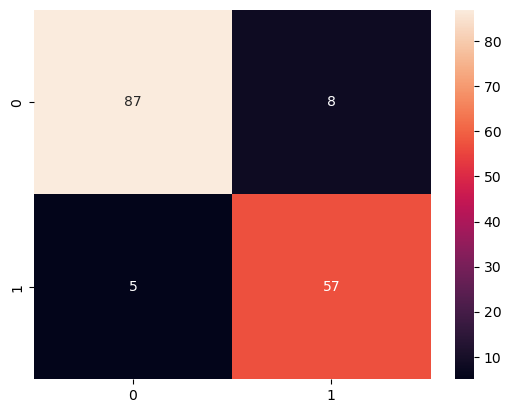

In [28]:
y_train_class = (y_train > y_train.mean()).astype(int)
y_test_class = (y_test > y_test.mean()).astype(int)
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train_class)
y_pred_class = lr_model.predict(x_test_scaled)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Accuracy: {accuracy}')
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print(f"Confusion Matrix:\n{conf_matrix}")
sns.heatmap(confusion_matrix(y_test_class, y_pred_class),annot=True)

In [29]:
print("Logistic Classification_Report: \n",(classification_report(y_test_class,y_pred_class)))

Logistic Classification_Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        95
           1       0.88      0.92      0.90        62

    accuracy                           0.92       157
   macro avg       0.91      0.92      0.91       157
weighted avg       0.92      0.92      0.92       157



#### Xgboost

Accuracy: 0.9681528662420382
Xgboost Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.98      0.94      0.96        62

    accuracy                           0.97       157
   macro avg       0.97      0.96      0.97       157
weighted avg       0.97      0.97      0.97       157



<Axes: >

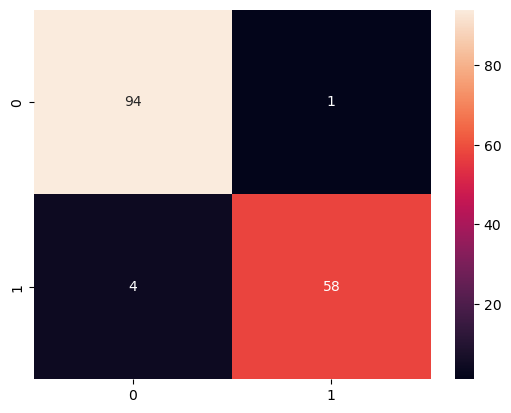

In [30]:
#pip install xgboost
xgb_model = XGBClassifier()
xgb_model.fit(x_train_scaled, y_train_class)
y_pred_xgb = xgb_model.predict(x_test_scaled)
accuracy_xgb = accuracy_score(y_test_class, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb}')
print("Xgboost Classification_Report: \n",(classification_report(y_test_class,y_pred_xgb)))
conf_matrix = confusion_matrix(y_test_class, y_pred_xgb)
sns.heatmap(data=confusion_matrix(y_test_class, y_pred_xgb),annot=True)

#### Decsision Tree

Decision tree Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.97      0.95      0.96        62

    accuracy                           0.97       157
   macro avg       0.97      0.97      0.97       157
weighted avg       0.97      0.97      0.97       157



<Axes: >

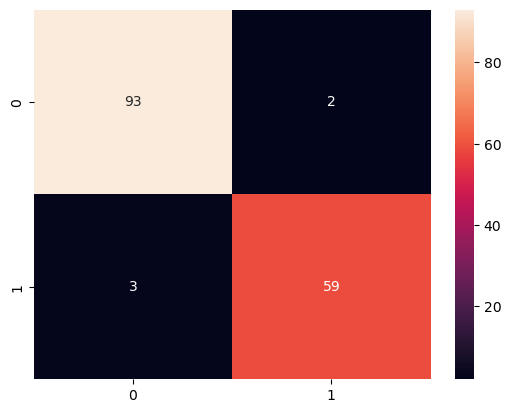

In [31]:
DTC_model = DecisionTreeClassifier(random_state=42)
DTC_model.fit(x_train_scaled, y_train_class)
y_pred_tree = DTC_model.predict(x_test_scaled)
accuracy_tree = accuracy_score(y_test_class, y_pred_tree)
print("Decision tree Classification_Report: \n",(classification_report(y_test_class,y_pred_tree)))
conf_matrix = confusion_matrix(y_test_class, y_pred_tree)
sns.heatmap(data=confusion_matrix(y_test_class, y_pred_tree),annot=True)

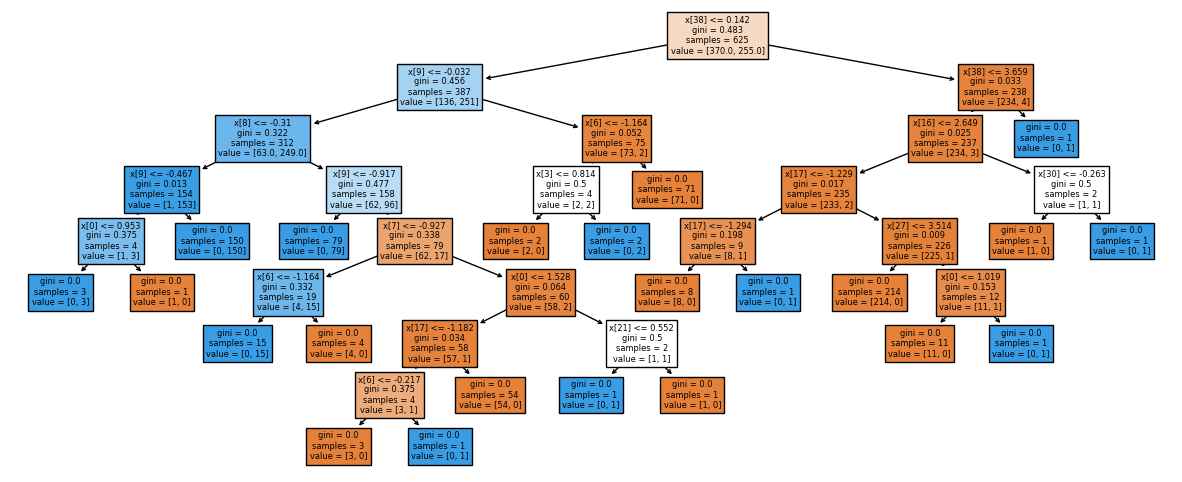

In [32]:
plt.figure(figsize=(15,6))
tree.plot_tree(DTC_model, filled=True)
plt.show()

#### Sample data Row

In [35]:
single_sample = x_test[1].reshape(1, -1)  # Reshape for compatibility
single_prediction = DTC_model.predict(single_sample)
print(single_sample)

print("Predicted appendictics for the single sample:", single_prediction[0])

[[ 14.42        23.24         0.         151.          53.
    6.           5.92191781   5.25342466   0.           7.7626506
    0.           1.           0.           0.           1.
    1.          36.8          7.6         71.79116348   0.
    4.58        13.1         12.8        234.           0.
    0.           0.           1.           0.           3.
    2.           0.           0.           0.           0.
    0.           1.           1.           2.           1.        ]]
Predicted appendictics for the single sample: 1


#### Prediction With Input data

In [36]:
# Get input as a string
input_string = input("Enter the issues(comma-separated): ") 

# Split the input string into a list and convert to floats
try:
    single_sample = [float(x.strip()) for x in input_string.split(',')]
except ValueError as e:
    print(f"Error converting input to float: {e}")
    single_sample = []

# Ensure the input is reshaped correctly for the model if needed
import numpy as np
single_sample = np.array(single_sample).reshape(1, -1) 

# Make the prediction
if single_sample.size > 0: 
    single_prediction = DTC_model.predict(single_sample)
    print("appendicitis(0= appendicitis absent, 1 = appendicitis present) :  ",single_prediction[0])
else:
    print("No valid input provided for prediction.")

appendicitis(0= appendicitis absent, 1 = appendicitis present) :   1
